In [1]:
import numpy as np
import BiasVarv2 as bv
import matplotlib.pyplot as plt
import random
import seaborn as sns
import sys
sys.path.append("..")
from LeastSquare import LeastSquare as LS
from LinearRegression import LinearRegression as LR

sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Set2"))
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 3})


In [2]:
n_res = 100000
f = np.sin
x = np.linspace(-1, 1, n_res)
x_aug = np.array([[1, i] for i in x])
y = f(np.pi*x)

In [24]:
# D
num_model = 50

In [25]:
# n
num_sample = np.array([2, 5])
num_sample = np.append(num_sample, np.arange(10, 210, 10))

In [28]:
g_bar = []
bias = []
variance = []
in_sample_err = []
out_sample_err = []

for ns in num_sample:
    # gd
    lin_weights = np.array([])
    e_ins = []
    e_outs = []
    for i in range(num_model):
        x_sample = np.random.choice(x, ns)
        y_sample = f(np.pi*x_sample)
        lr = LR(x_sample, y_sample, learning_rate=0.001, max_iteration=500)
        lin_w = lr.parameters[-1]
        lin_w = np.array(lin_w)
        lin_weights = np.append(lin_weights, lin_w)
        x_sample_aug = np.array([[1, i] for i in x_sample])
        e_in = bv.cal_e_in(lin_w.dot(x_sample_aug.T), y_sample)
        e_ins.append(e_in)
        e_out = bv.cal_e_out(lin_w.dot(x_aug.T), y)
        e_outs.append(e_out)
    in_sample_err.append(np.mean(e_ins))
    out_sample_err.append(np.mean(e_outs))

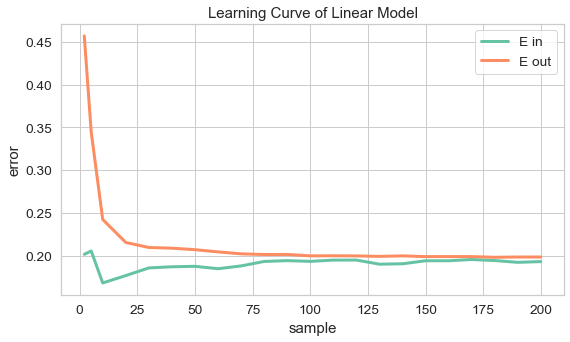

In [31]:
fig = plt.figure(figsize=(9, 5))
sns.lineplot(num_sample, in_sample_err, label='E in')
sns.lineplot(num_sample, out_sample_err, label='E out')
plt.title('Learning Curve of Linear Model')
plt.xlabel('sample')
plt.ylabel('error')
plt.savefig('01-learning-curve-lin-sin.png', dpi=150)